In [1]:
from GP import *
from GP_utils import *
import matplotlib.pyplot as plt
from pyDOE import lhs
import autograd.numpy as np

In [39]:
def f(x):
    return (6.0*x-2.0)**2 * np.sin(12.*x-4.0)

def f1(x):
    return x * np.sin(4.0*np.pi*x)

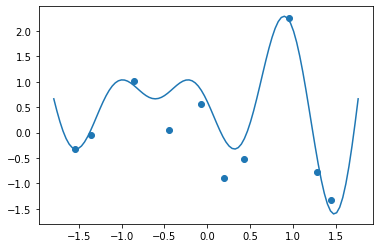

In [48]:
N_samples = 10
sigma_n = 0.2
d = 1

x = -0.5+(1+0.5)*lhs(d,N_samples)
xp = np.linspace(-0.5,1,100)

y = f1(x)+sigma_n*np.random.randn(N_samples,d)
yp = f1(xp)

ymean,ystd = y.mean(),y.std()
y = (y-ymean)/ystd

xmean,xstd = x.mean(),x.std()
x = (x-xmean)/xstd

xp = (xp-xmean)/xstd
yp = (yp-ymean)/ystd

GP_model = GP(x,y,periodic_kernel)
plt.scatter(x,y)
plt.plot(xp,yp)

# Draw prior samples

(-4, 4)

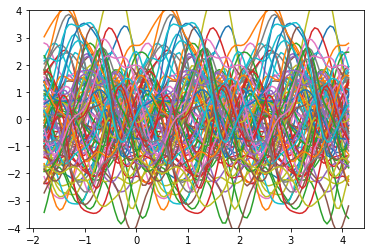

In [49]:
num_prior = 100
# guessed hyperparameters
hyp0 = np.log(np.ones((d+1,)))
sigma_n = np.array([-1])
hyp = np.concatenate([hyp0,sigma_n])

sigma_f_sin = np.array([np.log(2)])
hyp_sin0 = np.log(np.ones((d,)))
period = np.array([np.log(2)])
hyp_sin = np.concatenate([sigma_f_sin,hyp_sin0,period,sigma_n])

# number of test points for prior
test_num = 100
xtest = np.linspace(-0.5,2,test_num)[:,np.newaxis]
xtest = (xtest-xmean)/xstd

# find prior covariance
cov = periodic_kernel(xtest,xtest,hyp_sin[:-1])
ytest = np.random.multivariate_normal(np.zeros((len(xtest),)),cov,size=num_prior)
for i in range(ytest.shape[0]):
    plt.plot(xtest,ytest[i])
plt.ylim(-4,4)

In [50]:
hyp_final = GP_model.train(hyp_sin)

Log likelihood -4.253961178712004
Log likelihood -4.285908991729093
Log likelihood -4.3715546722970355
Log likelihood -4.537165942145957
Log likelihood -4.731880687627353
Log likelihood -4.801340334155857
Log likelihood -4.884961304222076
Log likelihood -5.06668845635776
Log likelihood -5.23492198085594
Log likelihood -5.48983364679297
Log likelihood -5.56002375035869
Log likelihood -5.600256411456509
Log likelihood -5.623171964642919
Log likelihood -5.637028934217979
Log likelihood -5.727664865627686
Log likelihood -6.019669016543807
Log likelihood -6.355469824047204
Log likelihood -6.800374174158483
Log likelihood -6.956945399721359
Log likelihood -7.087828451991613
Log likelihood -7.111064375118207
Log likelihood -7.113273316241155
Log likelihood -7.113297662952256
Log likelihood -7.113313087359019
Log likelihood -7.113328700630241
Log likelihood -7.113397974907846
Log likelihood -7.113493180588488
Log likelihood -7.11364054820202
Log likelihood -7.113763851855056
Log likelihood -7.

In [51]:
hyp_final

array([  0.44380325,  -0.49546645,   0.70008976, -18.59966969])

In [52]:
mu,cov = GP_model.predict(xp[:,np.newaxis])
post = np.random.multivariate_normal(mu[:,0],cov,size=10)

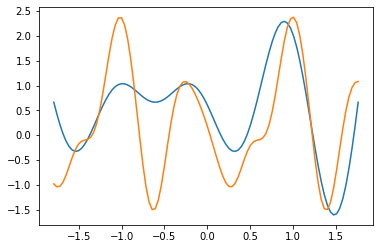

In [53]:
plt.plot(xp,yp)
plt.plot(xp,mu)

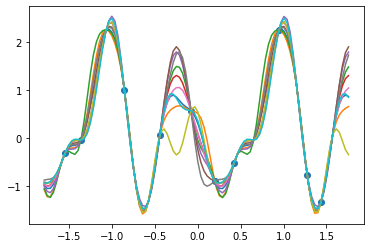

In [54]:
plt.scatter(x,y)
for i in range(post.shape[0]):
    plt.plot(xp,post[i])